In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LinearRegression

In [28]:
data = pd.read_csv("Train.csv")

In [29]:
train = data.values
print(train)

[[ 2.93416239e-01 -9.45598713e-01 -4.21105147e-01  4.06816021e-01
   5.25661832e-01 -8.21546666e+01]
 [-8.36084081e-01 -1.89228039e-01 -7.76402618e-01 -1.05383124e+00
   5.97996852e-01 -4.88979602e+01]
 [ 2.36425114e-01  1.32836018e-01 -1.47722982e-01  6.99853963e-01
  -1.87364163e-01  7.72703707e+01]
 ...
 [ 1.04417694e+00 -8.99206485e-01  1.73039905e+00 -1.87105676e+00
   4.42519647e-01 -1.07510508e+02]
 [-1.26917290e+00 -5.05215916e-03  1.85766873e+00 -1.08036482e+00
   7.36333937e-01 -4.73415578e+01]
 [-1.88400025e+00 -8.49427430e-01 -1.45227035e+00  4.88613076e-01
   1.45957580e+00 -1.15939003e+02]]


In [30]:
X = train[:, :5]
Y = train[:, 5]

# Normalize
u = np.mean(X, axis=0)
std = np.std(X, axis=0)

X = (X - u) / std

# Concatenating array of ones in front of dataset

ones = np.ones((X.shape[0], 1))
X  = np.hstack((ones, X))
print(X)
print(Y)

[[ 1.          0.29016495 -0.89871183 -0.37238147  0.44177059  0.52502448]
 [ 1.         -0.84270473 -0.15822922 -0.72365639 -0.99464217  0.59896038]
 [ 1.          0.23300381  0.15706968 -0.10209444  0.72994655 -0.20378187]
 ...
 [ 1.          1.0431652  -0.8532941   1.75476416 -1.79830858  0.44004223]
 [ 1.         -1.27708547  0.02207793  1.88059294 -1.0207355   0.74035908]
 [ 1.         -1.89374689 -0.80456069 -1.39187219  0.52221049  1.47960738]]
[ -82.15466656  -48.89796018   77.2703707  ... -107.51050797  -47.34155781
 -115.93900296]


In [31]:
def hypothesis(X, theta):
    return np.dot(X, theta)

def error(X, y, theta):
    y_ = hypothesis(X, theta)
    error = np.sum((y_ - y) ** 2)

    return error / X.shape[0]

def gradient(X, Y, theta):
    y_ = hypothesis(X, theta)
    grad = np.dot(X.T, (y_ - Y))

    return grad / X.shape[0]

def gradientDescent(X, Y, learning_rate = 0.1, max_epochs = 300):
    theta = np.zeros((X.shape[1],))
    error_list = []

    for i in range(max_epochs):
        error_list.append(error(X, Y, theta))
        grad = gradient(X, Y, theta)

        theta = theta - (learning_rate * grad)
    
    return theta, error_list


In [32]:
start = time.time()
theta, error_list = gradientDescent(X, Y)
end = time.time()

print("Time taken is", end - start)
theta

Time taken is 0.054927825927734375


array([ 0.31883538, 29.59359198, 94.65067706,  8.37544469, 45.52303635,
        2.46461552])

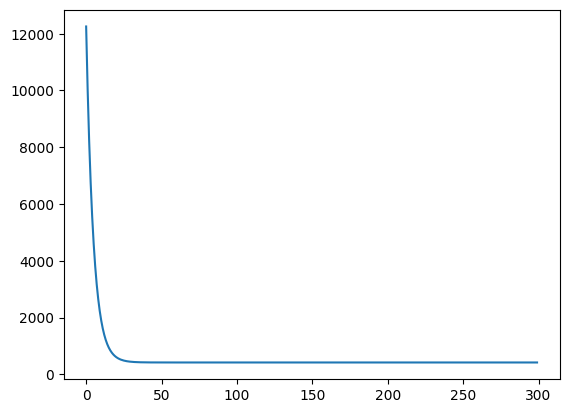

In [33]:
plt.plot(error_list)
plt.show()

In [34]:
def r2_square(X, Y, theta):
    y_ = hypothesis(X, theta)
    avg_y = np.mean(Y)

    num = np.sum((y_ - Y) ** 2)
    den = np.sum((y_ - avg_y) ** 2)

    accuracy = 1 - (num / den)

    return accuracy * 100

In [35]:
accuracy = r2_square(X, Y, theta)

print(accuracy)

96.49040008936005


In [36]:
data = pd.read_csv("Train.csv")

In [37]:
train = data.values
print(train)

[[ 2.93416239e-01 -9.45598713e-01 -4.21105147e-01  4.06816021e-01
   5.25661832e-01 -8.21546666e+01]
 [-8.36084081e-01 -1.89228039e-01 -7.76402618e-01 -1.05383124e+00
   5.97996852e-01 -4.88979602e+01]
 [ 2.36425114e-01  1.32836018e-01 -1.47722982e-01  6.99853963e-01
  -1.87364163e-01  7.72703707e+01]
 ...
 [ 1.04417694e+00 -8.99206485e-01  1.73039905e+00 -1.87105676e+00
   4.42519647e-01 -1.07510508e+02]
 [-1.26917290e+00 -5.05215916e-03  1.85766873e+00 -1.08036482e+00
   7.36333937e-01 -4.73415578e+01]
 [-1.88400025e+00 -8.49427430e-01 -1.45227035e+00  4.88613076e-01
   1.45957580e+00 -1.15939003e+02]]


In [38]:
X = train[:, :5]
Y = train[:, 5]

# Normalize
u = np.mean(X, axis=0)
std = np.std(X, axis=0)

X = (X - u) / std

In [39]:
model = LinearRegression()

In [40]:
model.fit(X, Y)

LinearRegression()

In [41]:
model.coef_

array([29.59359198, 94.65067706,  8.37544469, 45.52303635,  2.46461552])

In [42]:
model.intercept_

0.31883538441581594

In [43]:
model.score(X, Y)

0.9660939669975617

In [49]:
def mini_batch_gradient_descent(X, y, batch_size = 200, learning_rate = 0.01, max_iters = 10):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []

    data = np.hstack((X, y.reshape(-1, 1)))

    for i in range(max_iters) :

        # Mini - Batch Gradient Descent
        np.random.shuffle(data)
        m = data.shape[0]
        total_batches = m // batch_size

        for j in range(total_batches):
            batch_data = data[j * batch_size : (j + 1) * batch_size, :]
            x_batch = batch_data[:, :-1]
            y_batch = batch_data[:, -1]

            batch_gradient = gradient(x_batch, y_batch, theta)
            theta = theta - learning_rate * batch_gradient

            e = error(x_batch, y_batch, theta)
            error_list.append(e)

    return theta, error_list

In [50]:
X = train[:, :5]
Y = train[:, 5]

# Normalize
u = np.mean(X, axis=0)
std = np.std(X, axis=0)

X = (X - u) / std

# Concatenating array of ones in front of dataset

ones = np.ones((X.shape[0], 1))
X  = np.hstack((ones, X))
print(X)
print(Y)

[[ 1.          0.29016495 -0.89871183 -0.37238147  0.44177059  0.52502448]
 [ 1.         -0.84270473 -0.15822922 -0.72365639 -0.99464217  0.59896038]
 [ 1.          0.23300381  0.15706968 -0.10209444  0.72994655 -0.20378187]
 ...
 [ 1.          1.0431652  -0.8532941   1.75476416 -1.79830858  0.44004223]
 [ 1.         -1.27708547  0.02207793  1.88059294 -1.0207355   0.74035908]
 [ 1.         -1.89374689 -0.80456069 -1.39187219  0.52221049  1.47960738]]
[ -82.15466656  -48.89796018   77.2703707  ... -107.51050797  -47.34155781
 -115.93900296]


In [51]:
theta, error_list = mini_batch_gradient_descent(X, Y, batch_size= 1)

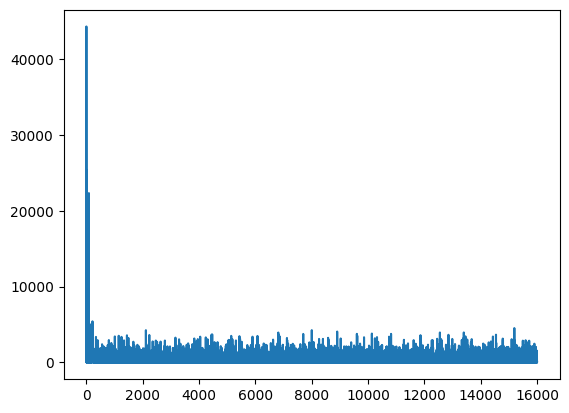

In [52]:
plt.plot(error_list)
plt.show()

In [53]:
print(r2_square(X, Y, theta))

96.5628333051637
